# Make Day-to-Night ratios with models only
### Now we need to call the msis model for the whole masking window of interest and construct the day-to-night ratio from it.

In [1]:
import numpy as np
from pymsis import msis
from datetime import datetime,timedelta
import pandas as pd



lon_array = np.arange(-180, 185, 5)
lat_array = np.arange( -40,  45, 5)
alt_array =  np.arange(300,500,5)      
# f107 = 150
# f107a = 150
# ap = 7


noaa = pd.read_pickle('constructed_files/noaa_2002_2010_pickle')



In [2]:
print(lon_array.shape)
print(lat_array.shape)
print(alt_array.shape)


(73,)
(17,)
(40,)


In [3]:
YEARS = [2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]
DAYS  = np.arange(1,366)
UT = 12
ALT_CHOOSE = 400

Day_SLT1 = 11.5
Day_SLT2 = 17.5
Night_SLT1 = 5.5
Night_SLT2 = 23.5


Total_day = []
Total_night = []

Total_ratio = []
date = []


for iyear,year in enumerate(YEARS):
    sltday =[]
    sltnight = []

    for iday,day in enumerate(DAYS):
        date_index =datetime(year, 1, 1) + timedelta(float(day) - 1) 
        date_msis = datetime(year, 1, 1) + timedelta(float(day) - 1) + timedelta(hours = UT) 

        print(date_index)
        f107a = float(noaa['f107a'][date_index])
        f107 = float(noaa['f107d'][date_index])
        ap = float(noaa['Ap'][date_index]) 
        aps = [[ap]*7]

        output2 = msis.run(date_msis, lon_array, lat_array, alt_array, f107, f107a, aps, version=2)
        output0 = msis.run(date_msis, lon_array, lat_array, alt_array, f107, f107a, aps, version=0)       

        if ap > 15:
            print('High geomag activity-- skip day')
            date.append(datetime(year, 1, 1) + timedelta(float(day) - 1) + timedelta( hours = UT ))
            Total_ratio.append(np.nan)
    
            Total_day.append(np.nan)
            Total_night.append(np.nan)

        else:
            # Save data from MSIS

            Total_alt_day = np.zeros( np.size(np.asarray(lat_array)))
            Total_alt_night = np.zeros( np.size(np.asarray(lat_array)))


            for ilat, latval in enumerate(np.asarray(lat_array)):
                date.append(datetime(year, 1, 1) + timedelta(float(day) - 1) + timedelta( hours = UT ))
                ialt = np.where(alt_array==ALT_CHOOSE)[0][0]

                # Conver to SLT and mask the data accordingly
                calc_slt = np.mod(np.asarray(lon_array)/15 + UT, 24)
                slt  = np.sort(calc_slt)
                islt = np.argsort(calc_slt)
                day_mask =  np.logical_and( slt >= Day_SLT1    , slt <= Day_SLT2 ) 
                night_mask = np.logical_or( slt >= Night_SLT2  , slt <= Night_SLT1) 

                Total_alt_day[ ilat] = output0[0][islt[day_mask], ilat, ialt][:,0].mean(axis=0)
                Total_alt_night[ ilat] = output0[0][islt[night_mask], ilat, ialt][:,0].mean(axis=0)

                Total_day.append(  Total_alt_day[ilat])
                Total_night.append(  Total_alt_night[ilat])

                Total_ratio.append(  Total_alt_day[ilat] / Total_alt_night[ilat])

        print(year,'/',day, '\n')


df_ratios = pd.DataFrame(data = {'date':date ,
                                 'Total_ratio':Total_ratio ,
                                })

df_daynightvalues = pd.DataFrame(data = {'date':date, 
                                        'Total_day':Total_day,
                                        'Total_night':Total_night,
                                              })



2002-01-01 00:00:00
2002 / 1 

2002-01-02 00:00:00
2002 / 2 

2002-01-03 00:00:00
2002 / 3 

2002-01-04 00:00:00
2002 / 4 

2002-01-05 00:00:00
2002 / 5 

2002-01-06 00:00:00
2002 / 6 

2002-01-07 00:00:00
2002 / 7 

2002-01-08 00:00:00
2002 / 8 

2002-01-09 00:00:00
2002 / 9 

2002-01-10 00:00:00
High geomag activity-- skip day
2002 / 10 

2002-01-11 00:00:00
High geomag activity-- skip day
2002 / 11 

2002-01-12 00:00:00
High geomag activity-- skip day
2002 / 12 

2002-01-13 00:00:00
2002 / 13 

2002-01-14 00:00:00
2002 / 14 

2002-01-15 00:00:00
2002 / 15 

2002-01-16 00:00:00
2002 / 16 

2002-01-17 00:00:00
2002 / 17 

2002-01-18 00:00:00
2002 / 18 

2002-01-19 00:00:00
2002 / 19 

2002-01-20 00:00:00
2002 / 20 

2002-01-21 00:00:00
2002 / 21 

2002-01-22 00:00:00
2002 / 22 

2002-01-23 00:00:00
2002 / 23 

2002-01-24 00:00:00
2002 / 24 

2002-01-25 00:00:00
2002 / 25 

2002-01-26 00:00:00
2002 / 26 

2002-01-27 00:00:00
2002 / 27 

2002-01-28 00:00:00
2002 / 28 

2002-01-29 00:00:

2002 / 217 

2002-08-06 00:00:00
2002 / 218 

2002-08-07 00:00:00
2002 / 219 

2002-08-08 00:00:00
2002 / 220 

2002-08-09 00:00:00
2002 / 221 

2002-08-10 00:00:00
2002 / 222 

2002-08-11 00:00:00
2002 / 223 

2002-08-12 00:00:00
2002 / 224 

2002-08-13 00:00:00
2002 / 225 

2002-08-14 00:00:00
2002 / 226 

2002-08-15 00:00:00
High geomag activity-- skip day
2002 / 227 

2002-08-16 00:00:00
2002 / 228 

2002-08-17 00:00:00
2002 / 229 

2002-08-18 00:00:00
High geomag activity-- skip day
2002 / 230 

2002-08-19 00:00:00
High geomag activity-- skip day
2002 / 231 

2002-08-20 00:00:00
High geomag activity-- skip day
2002 / 232 

2002-08-21 00:00:00
High geomag activity-- skip day
2002 / 233 

2002-08-22 00:00:00
2002 / 234 

2002-08-23 00:00:00
2002 / 235 

2002-08-24 00:00:00
2002 / 236 

2002-08-25 00:00:00
2002 / 237 

2002-08-26 00:00:00
High geomag activity-- skip day
2002 / 238 

2002-08-27 00:00:00
2002 / 239 

2002-08-28 00:00:00
2002 / 240 

2002-08-29 00:00:00
2002 / 241 

200

2003 / 36 

2003-02-06 00:00:00
2003 / 37 

2003-02-07 00:00:00
2003 / 38 

2003-02-08 00:00:00
High geomag activity-- skip day
2003 / 39 

2003-02-09 00:00:00
High geomag activity-- skip day
2003 / 40 

2003-02-10 00:00:00
High geomag activity-- skip day
2003 / 41 

2003-02-11 00:00:00
2003 / 42 

2003-02-12 00:00:00
2003 / 43 

2003-02-13 00:00:00
2003 / 44 

2003-02-14 00:00:00
High geomag activity-- skip day
2003 / 45 

2003-02-15 00:00:00
High geomag activity-- skip day
2003 / 46 

2003-02-16 00:00:00
High geomag activity-- skip day
2003 / 47 

2003-02-17 00:00:00
2003 / 48 

2003-02-18 00:00:00
High geomag activity-- skip day
2003 / 49 

2003-02-19 00:00:00
2003 / 50 

2003-02-20 00:00:00
High geomag activity-- skip day
2003 / 51 

2003-02-21 00:00:00
2003 / 52 

2003-02-22 00:00:00
2003 / 53 

2003-02-23 00:00:00
2003 / 54 

2003-02-24 00:00:00
2003 / 55 

2003-02-25 00:00:00
2003 / 56 

2003-02-26 00:00:00
2003 / 57 

2003-02-27 00:00:00
High geomag activity-- skip day
2003 / 5

High geomag activity-- skip day
2003 / 193 

2003-07-13 00:00:00
2003 / 194 

2003-07-14 00:00:00
2003 / 195 

2003-07-15 00:00:00
High geomag activity-- skip day
2003 / 196 

2003-07-16 00:00:00
High geomag activity-- skip day
2003 / 197 

2003-07-17 00:00:00
High geomag activity-- skip day
2003 / 198 

2003-07-18 00:00:00
2003 / 199 

2003-07-19 00:00:00
High geomag activity-- skip day
2003 / 200 

2003-07-20 00:00:00
High geomag activity-- skip day
2003 / 201 

2003-07-21 00:00:00
2003 / 202 

2003-07-22 00:00:00
2003 / 203 

2003-07-23 00:00:00
2003 / 204 

2003-07-24 00:00:00
2003 / 205 

2003-07-25 00:00:00
2003 / 206 

2003-07-26 00:00:00
High geomag activity-- skip day
2003 / 207 

2003-07-27 00:00:00
High geomag activity-- skip day
2003 / 208 

2003-07-28 00:00:00
High geomag activity-- skip day
2003 / 209 

2003-07-29 00:00:00
High geomag activity-- skip day
2003 / 210 

2003-07-30 00:00:00
High geomag activity-- skip day
2003 / 211 

2003-07-31 00:00:00
High geomag activity-

High geomag activity-- skip day
2003 / 356 

2003-12-23 00:00:00
2003 / 357 

2003-12-24 00:00:00
2003 / 358 

2003-12-25 00:00:00
2003 / 359 

2003-12-26 00:00:00
2003 / 360 

2003-12-27 00:00:00
2003 / 361 

2003-12-28 00:00:00
2003 / 362 

2003-12-29 00:00:00
2003 / 363 

2003-12-30 00:00:00
2003 / 364 

2003-12-31 00:00:00
High geomag activity-- skip day
2003 / 365 

2004-01-01 00:00:00
High geomag activity-- skip day
2004 / 1 

2004-01-02 00:00:00
2004 / 2 

2004-01-03 00:00:00
High geomag activity-- skip day
2004 / 3 

2004-01-04 00:00:00
High geomag activity-- skip day
2004 / 4 

2004-01-05 00:00:00
High geomag activity-- skip day
2004 / 5 

2004-01-06 00:00:00
High geomag activity-- skip day
2004 / 6 

2004-01-07 00:00:00
High geomag activity-- skip day
2004 / 7 

2004-01-08 00:00:00
2004 / 8 

2004-01-09 00:00:00
High geomag activity-- skip day
2004 / 9 

2004-01-10 00:00:00
High geomag activity-- skip day
2004 / 10 

2004-01-11 00:00:00
High geomag activity-- skip day
2004 / 

2004 / 188 

2004-07-07 00:00:00
2004 / 189 

2004-07-08 00:00:00
2004 / 190 

2004-07-09 00:00:00
2004 / 191 

2004-07-10 00:00:00
2004 / 192 

2004-07-11 00:00:00
High geomag activity-- skip day
2004 / 193 

2004-07-12 00:00:00
2004 / 194 

2004-07-13 00:00:00
2004 / 195 

2004-07-14 00:00:00
2004 / 196 

2004-07-15 00:00:00
2004 / 197 

2004-07-16 00:00:00
2004 / 198 

2004-07-17 00:00:00
High geomag activity-- skip day
2004 / 199 

2004-07-18 00:00:00
2004 / 200 

2004-07-19 00:00:00
2004 / 201 

2004-07-20 00:00:00
2004 / 202 

2004-07-21 00:00:00
2004 / 203 

2004-07-22 00:00:00
High geomag activity-- skip day
2004 / 204 

2004-07-23 00:00:00
High geomag activity-- skip day
2004 / 205 

2004-07-24 00:00:00
High geomag activity-- skip day
2004 / 206 

2004-07-25 00:00:00
High geomag activity-- skip day
2004 / 207 

2004-07-26 00:00:00
High geomag activity-- skip day
2004 / 208 

2004-07-27 00:00:00
High geomag activity-- skip day
2004 / 209 

2004-07-28 00:00:00
2004 / 210 

2004-

High geomag activity-- skip day
2005 / 22 

2005-01-23 00:00:00
High geomag activity-- skip day
2005 / 23 

2005-01-24 00:00:00
2005 / 24 

2005-01-25 00:00:00
2005 / 25 

2005-01-26 00:00:00
2005 / 26 

2005-01-27 00:00:00
2005 / 27 

2005-01-28 00:00:00
2005 / 28 

2005-01-29 00:00:00
High geomag activity-- skip day
2005 / 29 

2005-01-30 00:00:00
High geomag activity-- skip day
2005 / 30 

2005-01-31 00:00:00
High geomag activity-- skip day
2005 / 31 

2005-02-01 00:00:00
2005 / 32 

2005-02-02 00:00:00
2005 / 33 

2005-02-03 00:00:00
2005 / 34 

2005-02-04 00:00:00
2005 / 35 

2005-02-05 00:00:00
2005 / 36 

2005-02-06 00:00:00
2005 / 37 

2005-02-07 00:00:00
High geomag activity-- skip day
2005 / 38 

2005-02-08 00:00:00
High geomag activity-- skip day
2005 / 39 

2005-02-09 00:00:00
High geomag activity-- skip day
2005 / 40 

2005-02-10 00:00:00
High geomag activity-- skip day
2005 / 41 

2005-02-11 00:00:00
2005 / 42 

2005-02-12 00:00:00
2005 / 43 

2005-02-13 00:00:00
2005 / 4

2005 / 221 

2005-08-10 00:00:00
High geomag activity-- skip day
2005 / 222 

2005-08-11 00:00:00
2005 / 223 

2005-08-12 00:00:00
2005 / 224 

2005-08-13 00:00:00
High geomag activity-- skip day
2005 / 225 

2005-08-14 00:00:00
2005 / 226 

2005-08-15 00:00:00
2005 / 227 

2005-08-16 00:00:00
2005 / 228 

2005-08-17 00:00:00
2005 / 229 

2005-08-18 00:00:00
2005 / 230 

2005-08-19 00:00:00
2005 / 231 

2005-08-20 00:00:00
2005 / 232 

2005-08-21 00:00:00
2005 / 233 

2005-08-22 00:00:00
2005 / 234 

2005-08-23 00:00:00
2005 / 235 

2005-08-24 00:00:00
High geomag activity-- skip day
2005 / 236 

2005-08-25 00:00:00
High geomag activity-- skip day
2005 / 237 

2005-08-26 00:00:00
2005 / 238 

2005-08-27 00:00:00
2005 / 239 

2005-08-28 00:00:00
2005 / 240 

2005-08-29 00:00:00
2005 / 241 

2005-08-30 00:00:00
2005 / 242 

2005-08-31 00:00:00
High geomag activity-- skip day
2005 / 243 

2005-09-01 00:00:00
2005 / 244 

2005-09-02 00:00:00
High geomag activity-- skip day
2005 / 245 

200

High geomag activity-- skip day
2006 / 78 

2006-03-20 00:00:00
High geomag activity-- skip day
2006 / 79 

2006-03-21 00:00:00
2006 / 80 

2006-03-22 00:00:00
2006 / 81 

2006-03-23 00:00:00
2006 / 82 

2006-03-24 00:00:00
2006 / 83 

2006-03-25 00:00:00
2006 / 84 

2006-03-26 00:00:00
2006 / 85 

2006-03-27 00:00:00
2006 / 86 

2006-03-28 00:00:00
2006 / 87 

2006-03-29 00:00:00
2006 / 88 

2006-03-30 00:00:00
2006 / 89 

2006-03-31 00:00:00
2006 / 90 

2006-04-01 00:00:00
2006 / 91 

2006-04-02 00:00:00
2006 / 92 

2006-04-03 00:00:00
2006 / 93 

2006-04-04 00:00:00
2006 / 94 

2006-04-05 00:00:00
High geomag activity-- skip day
2006 / 95 

2006-04-06 00:00:00
2006 / 96 

2006-04-07 00:00:00
2006 / 97 

2006-04-08 00:00:00
2006 / 98 

2006-04-09 00:00:00
High geomag activity-- skip day
2006 / 99 

2006-04-10 00:00:00
2006 / 100 

2006-04-11 00:00:00
2006 / 101 

2006-04-12 00:00:00
2006 / 102 

2006-04-13 00:00:00
2006 / 103 

2006-04-14 00:00:00
High geomag activity-- skip day
2006

2006 / 300 

2006-10-28 00:00:00
2006 / 301 

2006-10-29 00:00:00
High geomag activity-- skip day
2006 / 302 

2006-10-30 00:00:00
2006 / 303 

2006-10-31 00:00:00
2006 / 304 

2006-11-01 00:00:00
2006 / 305 

2006-11-02 00:00:00
2006 / 306 

2006-11-03 00:00:00
2006 / 307 

2006-11-04 00:00:00
2006 / 308 

2006-11-05 00:00:00
2006 / 309 

2006-11-06 00:00:00
2006 / 310 

2006-11-07 00:00:00
2006 / 311 

2006-11-08 00:00:00
2006 / 312 

2006-11-09 00:00:00
2006 / 313 

2006-11-10 00:00:00
High geomag activity-- skip day
2006 / 314 

2006-11-11 00:00:00
High geomag activity-- skip day
2006 / 315 

2006-11-12 00:00:00
2006 / 316 

2006-11-13 00:00:00
2006 / 317 

2006-11-14 00:00:00
2006 / 318 

2006-11-15 00:00:00
2006 / 319 

2006-11-16 00:00:00
2006 / 320 

2006-11-17 00:00:00
2006 / 321 

2006-11-18 00:00:00
2006 / 322 

2006-11-19 00:00:00
2006 / 323 

2006-11-20 00:00:00
2006 / 324 

2006-11-21 00:00:00
2006 / 325 

2006-11-22 00:00:00
2006 / 326 

2006-11-23 00:00:00
2006 / 327 



2007 / 146 

2007-05-27 00:00:00
2007 / 147 

2007-05-28 00:00:00
2007 / 148 

2007-05-29 00:00:00
2007 / 149 

2007-05-30 00:00:00
2007 / 150 

2007-05-31 00:00:00
2007 / 151 

2007-06-01 00:00:00
2007 / 152 

2007-06-02 00:00:00
2007 / 153 

2007-06-03 00:00:00
2007 / 154 

2007-06-04 00:00:00
2007 / 155 

2007-06-05 00:00:00
2007 / 156 

2007-06-06 00:00:00
2007 / 157 

2007-06-07 00:00:00
2007 / 158 

2007-06-08 00:00:00
2007 / 159 

2007-06-09 00:00:00
2007 / 160 

2007-06-10 00:00:00
2007 / 161 

2007-06-11 00:00:00
2007 / 162 

2007-06-12 00:00:00
2007 / 163 

2007-06-13 00:00:00
2007 / 164 

2007-06-14 00:00:00
High geomag activity-- skip day
2007 / 165 

2007-06-15 00:00:00
2007 / 166 

2007-06-16 00:00:00
2007 / 167 

2007-06-17 00:00:00
2007 / 168 

2007-06-18 00:00:00
2007 / 169 

2007-06-19 00:00:00
2007 / 170 

2007-06-20 00:00:00
2007 / 171 

2007-06-21 00:00:00
2007 / 172 

2007-06-22 00:00:00
2007 / 173 

2007-06-23 00:00:00
2007 / 174 

2007-06-24 00:00:00
2007 / 175 

2008 / 11 

2008-01-12 00:00:00
2008 / 12 

2008-01-13 00:00:00
2008 / 13 

2008-01-14 00:00:00
High geomag activity-- skip day
2008 / 14 

2008-01-15 00:00:00
2008 / 15 

2008-01-16 00:00:00
2008 / 16 

2008-01-17 00:00:00
2008 / 17 

2008-01-18 00:00:00
2008 / 18 

2008-01-19 00:00:00
2008 / 19 

2008-01-20 00:00:00
2008 / 20 

2008-01-21 00:00:00
2008 / 21 

2008-01-22 00:00:00
2008 / 22 

2008-01-23 00:00:00
2008 / 23 

2008-01-24 00:00:00
2008 / 24 

2008-01-25 00:00:00
2008 / 25 

2008-01-26 00:00:00
2008 / 26 

2008-01-27 00:00:00
2008 / 27 

2008-01-28 00:00:00
2008 / 28 

2008-01-29 00:00:00
2008 / 29 

2008-01-30 00:00:00
2008 / 30 

2008-01-31 00:00:00
2008 / 31 

2008-02-01 00:00:00
High geomag activity-- skip day
2008 / 32 

2008-02-02 00:00:00
High geomag activity-- skip day
2008 / 33 

2008-02-03 00:00:00
High geomag activity-- skip day
2008 / 34 

2008-02-04 00:00:00
2008 / 35 

2008-02-05 00:00:00
2008 / 36 

2008-02-06 00:00:00
2008 / 37 

2008-02-07 00:00:00
2008 / 3

2008 / 238 

2008-08-26 00:00:00
2008 / 239 

2008-08-27 00:00:00
2008 / 240 

2008-08-28 00:00:00
2008 / 241 

2008-08-29 00:00:00
2008 / 242 

2008-08-30 00:00:00
2008 / 243 

2008-08-31 00:00:00
2008 / 244 

2008-09-01 00:00:00
2008 / 245 

2008-09-02 00:00:00
2008 / 246 

2008-09-03 00:00:00
2008 / 247 

2008-09-04 00:00:00
High geomag activity-- skip day
2008 / 248 

2008-09-05 00:00:00
2008 / 249 

2008-09-06 00:00:00
2008 / 250 

2008-09-07 00:00:00
2008 / 251 

2008-09-08 00:00:00
2008 / 252 

2008-09-09 00:00:00
2008 / 253 

2008-09-10 00:00:00
2008 / 254 

2008-09-11 00:00:00
2008 / 255 

2008-09-12 00:00:00
2008 / 256 

2008-09-13 00:00:00
2008 / 257 

2008-09-14 00:00:00
2008 / 258 

2008-09-15 00:00:00
High geomag activity-- skip day
2008 / 259 

2008-09-16 00:00:00
2008 / 260 

2008-09-17 00:00:00
2008 / 261 

2008-09-18 00:00:00
2008 / 262 

2008-09-19 00:00:00
2008 / 263 

2008-09-20 00:00:00
2008 / 264 

2008-09-21 00:00:00
2008 / 265 

2008-09-22 00:00:00
2008 / 266 


2009 / 118 

2009-04-29 00:00:00
2009 / 119 

2009-04-30 00:00:00
2009 / 120 

2009-05-01 00:00:00
2009 / 121 

2009-05-02 00:00:00
2009 / 122 

2009-05-03 00:00:00
2009 / 123 

2009-05-04 00:00:00
2009 / 124 

2009-05-05 00:00:00
2009 / 125 

2009-05-06 00:00:00
2009 / 126 

2009-05-07 00:00:00
2009 / 127 

2009-05-08 00:00:00
2009 / 128 

2009-05-09 00:00:00
2009 / 129 

2009-05-10 00:00:00
2009 / 130 

2009-05-11 00:00:00
2009 / 131 

2009-05-12 00:00:00
2009 / 132 

2009-05-13 00:00:00
2009 / 133 

2009-05-14 00:00:00
2009 / 134 

2009-05-15 00:00:00
2009 / 135 

2009-05-16 00:00:00
2009 / 136 

2009-05-17 00:00:00
2009 / 137 

2009-05-18 00:00:00
2009 / 138 

2009-05-19 00:00:00
2009 / 139 

2009-05-20 00:00:00
2009 / 140 

2009-05-21 00:00:00
2009 / 141 

2009-05-22 00:00:00
2009 / 142 

2009-05-23 00:00:00
2009 / 143 

2009-05-24 00:00:00
2009 / 144 

2009-05-25 00:00:00
2009 / 145 

2009-05-26 00:00:00
2009 / 146 

2009-05-27 00:00:00
2009 / 147 

2009-05-28 00:00:00
2009 / 148

2009 / 364 

2009-12-31 00:00:00
2009 / 365 



In [4]:
# take 1 day average:
import msise00.plots as msplots
import msise00
from typing import Tuple, Union
from typing import Tuple, Union
import os
import pandas as pd
import numpy as np 
from collections import defaultdict
from datetime import datetime,timedelta
import pickle
import sys  
# years = [2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009]
# days =   np.arange(1,366)



date_test = []

avg_Total = []

avg_Total_day = []
avg_Total_night = []


for iyear,year in enumerate(YEARS):
    for iday,day in enumerate(DAYS):
        mask = np.logical_and(df_ratios['date'] > datetime(year, 1, 1) + timedelta(float(day)) , df_ratios['date'] < datetime(year, 1, 1) + timedelta(float(day)+1))
        avg_Total.append(np.mean(df_ratios['Total_ratio'][mask]))
        date_test.append(np.mean(df_ratios['date'][mask]))
        


        avg_Total_day.append(np.mean(df_daynightvalues['Total_day'][mask]))
        avg_Total_night.append(np.mean(df_daynightvalues['Total_night'][mask]))
        
        
        print(year,'/',day)





avg_Total = np.asarray(avg_Total)
avg_Total_day = np.asarray(avg_Total_day)
avg_Total_night = np.asarray(avg_Total_night)

m_p = 1.6726e-27 # [kg]



 

    


    

2002 / 1
2002 / 2
2002 / 3
2002 / 4
2002 / 5
2002 / 6
2002 / 7
2002 / 8
2002 / 9
2002 / 10
2002 / 11
2002 / 12
2002 / 13
2002 / 14
2002 / 15
2002 / 16
2002 / 17
2002 / 18
2002 / 19
2002 / 20
2002 / 21
2002 / 22
2002 / 23
2002 / 24
2002 / 25
2002 / 26
2002 / 27
2002 / 28
2002 / 29
2002 / 30
2002 / 31
2002 / 32
2002 / 33
2002 / 34
2002 / 35
2002 / 36
2002 / 37
2002 / 38
2002 / 39
2002 / 40
2002 / 41
2002 / 42
2002 / 43
2002 / 44
2002 / 45
2002 / 46
2002 / 47
2002 / 48
2002 / 49
2002 / 50
2002 / 51
2002 / 52
2002 / 53
2002 / 54
2002 / 55
2002 / 56
2002 / 57
2002 / 58
2002 / 59
2002 / 60
2002 / 61
2002 / 62
2002 / 63
2002 / 64
2002 / 65
2002 / 66
2002 / 67
2002 / 68
2002 / 69
2002 / 70
2002 / 71
2002 / 72
2002 / 73
2002 / 74
2002 / 75
2002 / 76
2002 / 77
2002 / 78
2002 / 79
2002 / 80
2002 / 81
2002 / 82
2002 / 83
2002 / 84
2002 / 85
2002 / 86
2002 / 87
2002 / 88
2002 / 89
2002 / 90
2002 / 91
2002 / 92
2002 / 93
2002 / 94
2002 / 95
2002 / 96
2002 / 97
2002 / 98
2002 / 99
2002 / 100
2002 / 1

2004 / 58
2004 / 59
2004 / 60
2004 / 61
2004 / 62
2004 / 63
2004 / 64
2004 / 65
2004 / 66
2004 / 67
2004 / 68
2004 / 69
2004 / 70
2004 / 71
2004 / 72
2004 / 73
2004 / 74
2004 / 75
2004 / 76
2004 / 77
2004 / 78
2004 / 79
2004 / 80
2004 / 81
2004 / 82
2004 / 83
2004 / 84
2004 / 85
2004 / 86
2004 / 87
2004 / 88
2004 / 89
2004 / 90
2004 / 91
2004 / 92
2004 / 93
2004 / 94
2004 / 95
2004 / 96
2004 / 97
2004 / 98
2004 / 99
2004 / 100
2004 / 101
2004 / 102
2004 / 103
2004 / 104
2004 / 105
2004 / 106
2004 / 107
2004 / 108
2004 / 109
2004 / 110
2004 / 111
2004 / 112
2004 / 113
2004 / 114
2004 / 115
2004 / 116
2004 / 117
2004 / 118
2004 / 119
2004 / 120
2004 / 121
2004 / 122
2004 / 123
2004 / 124
2004 / 125
2004 / 126
2004 / 127
2004 / 128
2004 / 129
2004 / 130
2004 / 131
2004 / 132
2004 / 133
2004 / 134
2004 / 135
2004 / 136
2004 / 137
2004 / 138
2004 / 139
2004 / 140
2004 / 141
2004 / 142
2004 / 143
2004 / 144
2004 / 145
2004 / 146
2004 / 147
2004 / 148
2004 / 149
2004 / 150
2004 / 151
2004 / 1

2006 / 115
2006 / 116
2006 / 117
2006 / 118
2006 / 119
2006 / 120
2006 / 121
2006 / 122
2006 / 123
2006 / 124
2006 / 125
2006 / 126
2006 / 127
2006 / 128
2006 / 129
2006 / 130
2006 / 131
2006 / 132
2006 / 133
2006 / 134
2006 / 135
2006 / 136
2006 / 137
2006 / 138
2006 / 139
2006 / 140
2006 / 141
2006 / 142
2006 / 143
2006 / 144
2006 / 145
2006 / 146
2006 / 147
2006 / 148
2006 / 149
2006 / 150
2006 / 151
2006 / 152
2006 / 153
2006 / 154
2006 / 155
2006 / 156
2006 / 157
2006 / 158
2006 / 159
2006 / 160
2006 / 161
2006 / 162
2006 / 163
2006 / 164
2006 / 165
2006 / 166
2006 / 167
2006 / 168
2006 / 169
2006 / 170
2006 / 171
2006 / 172
2006 / 173
2006 / 174
2006 / 175
2006 / 176
2006 / 177
2006 / 178
2006 / 179
2006 / 180
2006 / 181
2006 / 182
2006 / 183
2006 / 184
2006 / 185
2006 / 186
2006 / 187
2006 / 188
2006 / 189
2006 / 190
2006 / 191
2006 / 192
2006 / 193
2006 / 194
2006 / 195
2006 / 196
2006 / 197
2006 / 198
2006 / 199
2006 / 200
2006 / 201
2006 / 202
2006 / 203
2006 / 204
2006 / 205

2008 / 173
2008 / 174
2008 / 175
2008 / 176
2008 / 177
2008 / 178
2008 / 179
2008 / 180
2008 / 181
2008 / 182
2008 / 183
2008 / 184
2008 / 185
2008 / 186
2008 / 187
2008 / 188
2008 / 189
2008 / 190
2008 / 191
2008 / 192
2008 / 193
2008 / 194
2008 / 195
2008 / 196
2008 / 197
2008 / 198
2008 / 199
2008 / 200
2008 / 201
2008 / 202
2008 / 203
2008 / 204
2008 / 205
2008 / 206
2008 / 207
2008 / 208
2008 / 209
2008 / 210
2008 / 211
2008 / 212
2008 / 213
2008 / 214
2008 / 215
2008 / 216
2008 / 217
2008 / 218
2008 / 219
2008 / 220
2008 / 221
2008 / 222
2008 / 223
2008 / 224
2008 / 225
2008 / 226
2008 / 227
2008 / 228
2008 / 229
2008 / 230
2008 / 231
2008 / 232
2008 / 233
2008 / 234
2008 / 235
2008 / 236
2008 / 237
2008 / 238
2008 / 239
2008 / 240
2008 / 241
2008 / 242
2008 / 243
2008 / 244
2008 / 245
2008 / 246
2008 / 247
2008 / 248
2008 / 249
2008 / 250
2008 / 251
2008 / 252
2008 / 253
2008 / 254
2008 / 255
2008 / 256
2008 / 257
2008 / 258
2008 / 259
2008 / 260
2008 / 261
2008 / 262
2008 / 263

/home/zawa8770/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


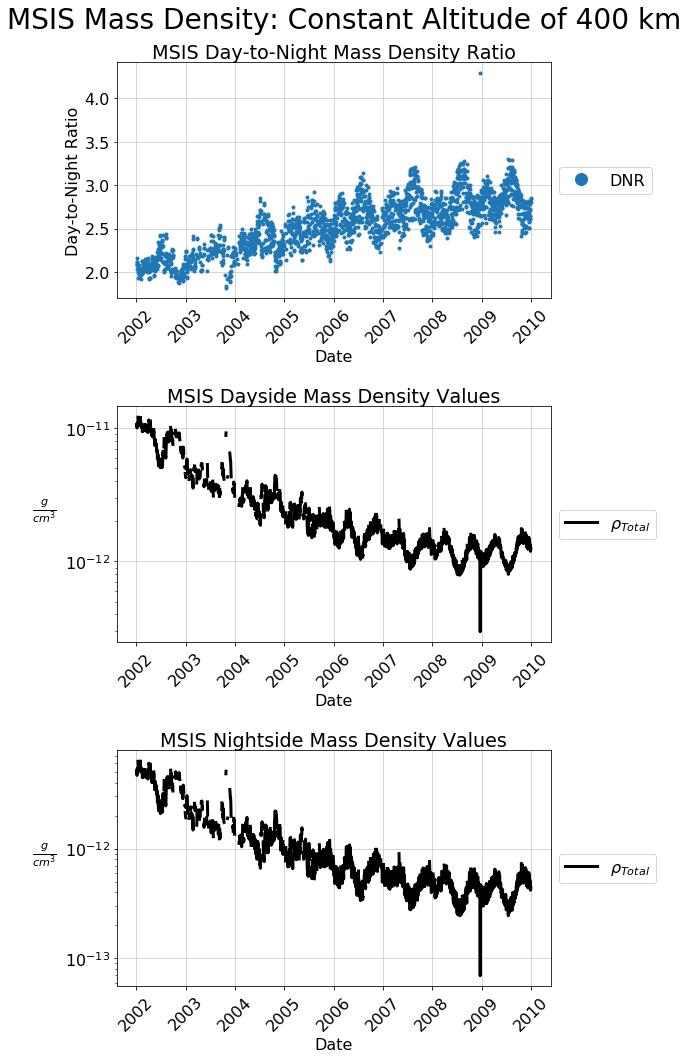

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib as mpl

mpl.rcParams['lines.markersize'] = 3
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 1
plt.rcParams['grid.color'] = "#cccccc"
plt.rcParams.update({'font.size': 16})
rc('font',**{'family':'sans-serif','sans-serif':['Calibri']})
plt.rcParams['axes.titlesize']='large' 
plt.rcParams['axes.titlepad']= 3
rc('text', usetex=False)
plt.rcParams["legend.loc"] = 'best'


fig, ( ax1, ax2,ax3) = plt.subplots(3,1, figsize=(10,15), sharex=False)




fig.suptitle('MSIS Mass Density: Constant Altitude of 400 km',y =.99, size=28 )
ax1.set_title('MSIS Day-to-Night Mass Density Ratio')
ax1.plot(date_test[1:], avg_Total[1:], '.', markersize =6 , label ='DNR')
ax1.set(xlabel= 'Date') 
ax1.set(ylabel=  'Day-to-Night Ratio')  
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[::-1], labels[::-1],  loc='center left', bbox_to_anchor=(1,0.5), markerscale = 4 )
# ax1.set(ylim =  [1.5,3.5])  

ax2.set_title('MSIS Dayside Mass Density Values')
ax2.semilogy(date_test[1:], avg_Total_day[1:], label =r'$\rho_{Total}$' , color = 'k',  linewidth=3)
# ax2.semilogy(date_test[1:], rho_O2_day[1:]*1e3, '.', label =r'$\rho_{O2}$' )
# ax2.semilogy(date_test[1:], rho_O_day[1:]*1e3, '.', label =r'$\rho_{O}$' )
# ax2.semilogy(date_test[1:], rho_N2_day[1:]*1e3, '.', label =r'$\rho_{N2}$' )
# ax2.semilogy(date_test[1:], rho_He_day[1:]*1e3, '.', label =r'$\rho_{He}$' )
# ax2.semilogy(date_test[1:], rho_H_day[1:], '.', label =r'$\rho_{H}$' )
# ax2.semilogy(date_test[1:], rho_N_day[1:], '.', label =r'$\rho_{N}$' )
# ax2.semilogy(date_test[1:], rho_AnomalousO_day[1:], '.', label =r'$\rho_{AnomalousO}$' )

ax2.set(xlabel= 'Date') 
ax2.set_ylabel(r'$\frac{g}{cm^3}$', rotation=0, labelpad=20)  
handles2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(handles2[::-1], labels2[::-1],  loc='center left', bbox_to_anchor=(1,0.5), markerscale = 4 )

ax3.set_title('MSIS Nightside Mass Density Values')
ax3.semilogy(date_test[1:], avg_Total_night[1:], label =r'$\rho_{Total}$', color = 'k',  linewidth=3 )
# ax3.semilogy(date_test[1:], rho_O2_night[1:]*1e3, '.', label =r'$\rho_{O2}$' )
# ax3.semilogy(date_test[1:], rho_O_night[1:]*1e3, '.', label =r'$\rho_{O}$' )
# ax3.semilogy(date_test[1:], rho_N2_night[1:]*1e3,'.',  label =r'$\rho_{N2}$' )
# ax3.semilogy(date_test[1:], rho_He_night[1:]*1e3,'.',  label =r'$\rho_{He}$' )
# ax3.semilogy(date_test[1:], rho_H_night[1:], '.', label =r'$\rho_{H}$' )
# ax3.semilogy(date_test[1:], rho_N_night[1:],'.',  label =r'$\rho_{N}$' )
# ax3.semilogy(date_test[1:], rho_AnomalousO_night[1:],'.',  label =r'$\rho_{AnomalousO}$' )
ax3.set(xlabel= 'Date') 
ax3.set_ylabel(r'$\frac{g}{cm^3}$', rotation=0, labelpad=20)  
# ax1.set(ylim =  [1.4,3.25])  
# ax3.set(ylim =  [1e-20,1e-13])  
# ax2.set(ylim =  [1e-20,1e-13])  



handles3, labels3 = ax3.get_legend_handles_labels()
ax3.legend(handles3[::-1], labels3[::-1],  loc='center left', bbox_to_anchor=(1,0.5), markerscale = 4 )

fig.tight_layout( pad=3.0)


for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=45)

